In [191]:
# seed the pseudorandom number generator
import random
import numpy as np
import math
from random import seed
import scipy
from scipy.stats import randint 
from scipy.stats import chisquare
from scipy.stats import poisson
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
seed(21)

In [147]:
text_file = open("hcmv.txt", "r")
text_file.readline()    # read in textfile of palindrome locations
lines = text_file.readlines()
lines = lines[:-1]
hcmv = []

In [148]:
for line in lines:
    hcmv.append(int(line))    # convert string into int of palindrome locations

### Q1: Generate Random Scatter

In [149]:
rand_scatter = randint.rvs(1, 229355, size = 296)    # generate 296 palindrome sites uniformly from 229354 sites
rand_scatter.sort()

### Q2: Investigate LOCATION & SPACING 

#### Graphic - Compare palindrome LOCATION of random scatter & HCMV

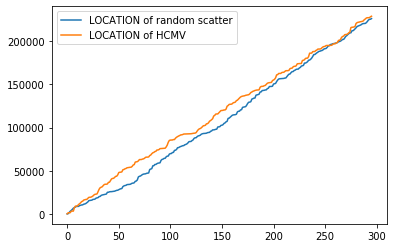

In [150]:
plt.plot(rand_scatter, label = "LOCATION of random scatter")
plt.plot(hcmv, label = "LOCATION of HCMV")
plt.legend()

#### Graphic - Compare palindrome SPACING of random scatter & HCMV

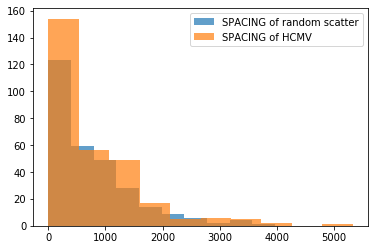

In [151]:
# create array for SPACING of palindrome
rand_spacing = np.diff(rand_scatter)
hcmv_spacing = np.diff(hcmv)
# graphically compare palindrome SPACING of random scatter vs. hcmv
plt.hist(rand_spacing, label = "SPACING of random scatter", alpha = 0.7)
plt.hist(hcmv_spacing, label = "SPACING of HCMV", alpha = 0.7)
plt.legend()

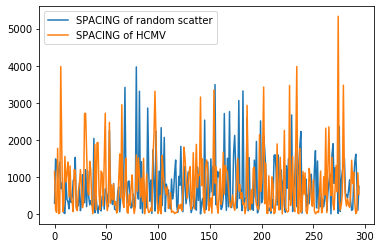

In [152]:
plt.plot(rand_spacing, label = "SPACING of random scatter")
plt.plot(hcmv_spacing, label = "SPACING of HCMV")
plt.legend()

#### Graphic - Compare palindrome CONSECUTIVE PAIRS & TRIPLETS

In [153]:
# sum of consecutive pairs
rand_pairs = zip(rand_spacing, rand_spacing[1:])
rand_pair_sum = list(map(sum, rand_pairs))
hcmv_pairs = zip(hcmv_spacing, hcmv_spacing[1:])
hcmv_pair_sum = list(map(sum, hcmv_pairs))
# sum of consecutive triplets
rand_triplets = zip(rand_spacing, rand_spacing[2:])
rand_triplet_sum = list(map(sum, rand_triplets))
hcmv_triplets = zip(hcmv_spacing, hcmv_spacing[2:])
hcmv_triplet_sum = list(map(sum, hcmv_triplets))

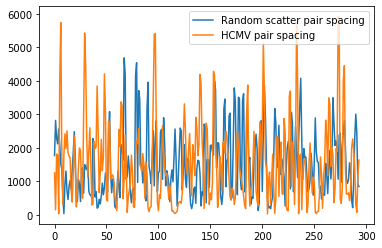

In [154]:
# consecutive pairs
plt.plot(rand_pair_sum, label = "Random scatter pair spacing")
plt.plot(hcmv_pair_sum, label = "HCMV pair spacing")
plt.legend()

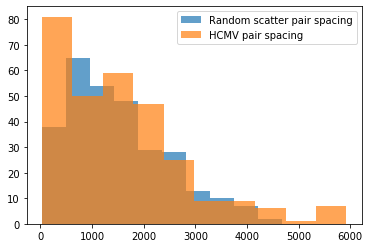

In [155]:
plt.hist(rand_pair_sum, label = "Random scatter pair spacing", alpha = 0.7)
plt.hist(hcmv_pair_sum, label = "HCMV pair spacing", alpha = 0.7)
plt.legend()

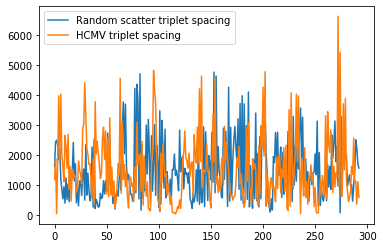

In [156]:
# consecutive triplets
plt.plot(rand_triplet_sum, label = "Random scatter triplet spacing")
plt.plot(hcmv_triplet_sum, label = "HCMV triplet spacing")
plt.legend()

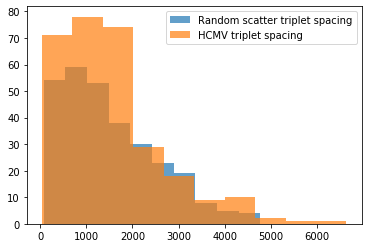

In [157]:
plt.hist(rand_triplet_sum, label = "Random scatter triplet spacing", alpha = 0.7)
plt.hist(hcmv_triplet_sum, label = "HCMV triplet spacing", alpha = 0.7)
plt.legend()

#### Location ~ Uniform Distribution

In [158]:
# divided DNA (site of 229354) into 20 equal length intervals
# length of each interval: 229354 / 20
# Expected number of palindromes in each location: 296/20
# Null: location is uniformly distributed
interval_size = 229354 / 20
location_expected = [296/20 for i in range(20)]
location_observed = [0 for i in range(20)]
for loc in hcmv:
    index = math.floor(loc / interval_size)    # use flooring to find the index that this specific palindrome location belongs to
    location_observed[index] = location_observed[index] + 1
chisquare(location_observed, f_exp=location_expected)    # fail to reject null: location is uniformly distributed

Power_divergenceResult(statistic=17.918918918918912, pvalue=0.5278603321193116)

In [159]:
# stats.kstest(hcmv_spacing, stats.expon.cdf)
# s = np.random.normal(size=100)
# stats.kstest(s, "norm")
# ts = np.linspace(0, 20, num = 200)
# plt.plot(ts, stats.expon(lambda_hat).cdf(ts))
# stats.kstest(np.random.exponential(3, 100), lambda x: stats.expon(1/3).cdf(x))

#### Exponential

(array([9.55041148e-04, 5.22717995e-04, 2.35812629e-04, 1.17906315e-04,
        6.28833678e-05, 3.53718944e-05, 1.57208419e-05, 1.37557367e-05,
        1.96510524e-06, 3.93021049e-06]),
 array([1.60082650e-01, 5.09038680e+02, 1.01791728e+03, 1.52679587e+03,
        2.03567447e+03, 2.54455307e+03, 3.05343167e+03, 3.56231026e+03,
        4.07118886e+03, 4.58006746e+03, 5.08894606e+03]),
 <a list of 10 Patch objects>)

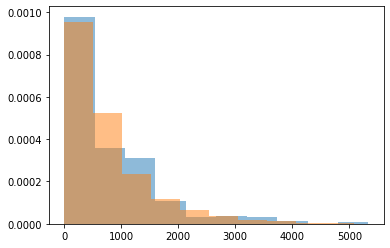

In [160]:
# in order to fit data into Exponential Distribution, we must first estimate lambda using maximum likelihood estimator 
# lamba_hat = sample mean of hcmv_spacing
lambda_hat = 1/np.mean(hcmv_spacing)

# theoretical vector
samp = np.random.exponential(lambda_hat, 295)
plt.hist(hcmv_spacing, density = True, alpha = 0.5)
plt.hist(np.random.exponential(1/lambda_hat, 1000), density = True, alpha = 0.5)

In [161]:
# expected spacing counts
max_spacing = max(hcmv_spacing)+1
# divide max spacing into 20 equal length spacing interval
spacing_interval = max_spacing / 8
spacing_expected_val = []
spacing_expected_cnts = []
for i in range(0,9):
    spacing_expected_val.append(i * spacing_interval)    # expected spacing value of the 20 interval
for i in range(8):
    prob = np.exp(-lambda_hat * spacing_expected_val[i]) - np.exp(-lambda_hat * spacing_expected_val[i+1]) 
    spacing_expected_cnts.append(prob * 295)    # counts of spacing that falls in between consecutive spacing values
# actual observed spacing counts
spacing_obs_cnts = [0 for i in range(8)]
for spacing in hcmv_spacing:
    index = math.floor(spacing / spacing_interval)    
    spacing_obs_cnts[index] = spacing_obs_cnts[index] + 1
chisquare(spacing_obs_cnts, f_exp=spacing_expected_cnts, ddof = 1)    # ddof is 1 because we estimated lambda


Power_divergenceResult(statistic=11.630921854542455, pvalue=0.07072749505344637)

In [162]:
# expected spacing counts
max_spacing = max(hcmv_spacing)+1
# divide max spacing into 20 equal length spacing interval
spacing_interval = max_spacing / 9
spacing_expected_val = []
spacing_expected_cnts = []
for i in range(0,10):
    spacing_expected_val.append(i * spacing_interval)    # expected spacing value of the 20 interval
for i in range(9):
    prob = np.exp(-lambda_hat * spacing_expected_val[i]) - np.exp(-lambda_hat * spacing_expected_val[i+1]) 
    spacing_expected_cnts.append(prob * 295)    # counts of spacing that falls in between consecutive spacing values
# actual observed spacing counts
spacing_obs_cnts = [0 for i in range(9)]
for spacing in hcmv_spacing:
    index = math.floor(spacing / spacing_interval)    
    spacing_obs_cnts[index] = spacing_obs_cnts[index] + 1
chisquare(spacing_obs_cnts, f_exp=spacing_expected_cnts, ddof = 1)    # ddof is 1 because we estimated lambda


Power_divergenceResult(statistic=7.03344218478643, pvalue=0.4254062020226244)

In [163]:
# expected spacing counts
max_spacing = max(hcmv_spacing)+1
# divide max spacing into 20 equal length spacing interval
spacing_interval = max_spacing / 10
spacing_expected_val = []
spacing_expected_cnts = []
for i in range(0,11):
    spacing_expected_val.append(i * spacing_interval)    # expected spacing value of the 20 interval
for i in range(10):
    prob = np.exp(-lambda_hat * spacing_expected_val[i]) - np.exp(-lambda_hat * spacing_expected_val[i+1]) 
    spacing_expected_cnts.append(prob * 295)    # counts of spacing that falls in between consecutive spacing values
# actual observed spacing counts
spacing_obs_cnts = [0 for i in range(10)]
for spacing in hcmv_spacing:
    index = math.floor(spacing / spacing_interval)    
    spacing_obs_cnts[index] = spacing_obs_cnts[index] + 1
chisquare(spacing_obs_cnts, f_exp=spacing_expected_cnts, ddof = 1)    # ddof is 1 because we estimated lambda


Power_divergenceResult(statistic=17.28858313425303, pvalue=0.02724050260532733)

#### Consecutive Pairs - Gamma(2, lambda) Distribution

In [164]:
gamma2_lambda_hat = 2 / np.mean(hcmv_pair_sum)
max_pair_spacing = max(hcmv_pair_sum) + 1
pair_spacing_interval = max_pair_spacing / 10
pair_spacing_expected_val = []
pair_spacing_expected_cnts = []
for i in range(0,11):
    pair_spacing_expected_val.append(i * pair_spacing_interval)
for i in range(10):
    prob = stats.gamma.cdf(pair_spacing_expected_val[i+1],1/gamma2_lambda_hat,scale=2) - stats.gamma.cdf(pair_spacing_expected_val[i],1/gamma2_lambda_hat,scale=2)
    pair_spacing_expected_cnts.append(prob * 294)
pair_obs_cnts = [0 for i in range(10)]
for pair in hcmv_pair_sum:
    index = math.floor(pair / pair_spacing_interval)    
    pair_obs_cnts[index] = pair_obs_cnts[index] + 1
chisquare(pair_obs_cnts, f_exp=pair_spacing_expected_cnts, ddof = 1) 

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5048: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

Text(0.5, 1.0, 'Theoretical Gamma(2, ƛ) Distribution')

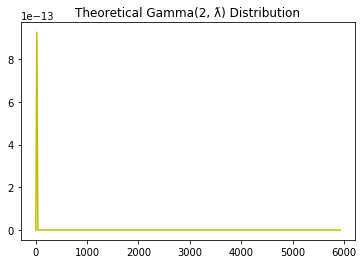

In [165]:
x = np.linspace (0, max_pair_spacing, 295) 
y1 = stats.gamma.pdf(x, a=gamma2_lambda_hat, loc=2) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 
plt.title("Theoretical Gamma(2, ƛ) Distribution")

Text(0.5, 1.0, 'Observed Consecutive Pairs')

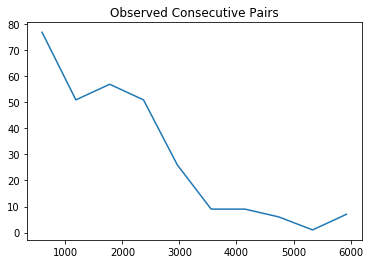

In [166]:
plt.plot(pair_spacing_expected_val[1:], pair_obs_cnts)  # observed counts of pairs of palindromes distributed across different spacing
plt.title("Observed Consecutive Pairs")

#### Consecutive Pairs - Gamma(3, lambda) Distribution

In [189]:
np.mean(hcmv_spacing)

775.5118644067796

In [167]:
gamma3_lambda_hat = 3 / np.mean(hcmv_spacing)
max_triplet_spacing = max(hcmv_triplet_sum) + 1
triplet_spacing_interval = max_triplet_spacing / 10
triplet_spacing_expected_val = []
triplet_spacing_expected_cnts = []
for i in range(0,11):
    triplet_spacing_expected_val.append(i * triplet_spacing_interval)
for i in range(10):
    prob = stats.gamma.cdf(triplet_spacing_expected_val[i+1],gamma3_lambda_hat,scale=3) - stats.gamma.cdf(triplet_spacing_expected_val[i],gamma3_lambda_hat,scale=3)
    triplet_spacing_expected_cnts.append(prob * 293)
triplet_obs_cnts = [0 for i in range(10)]
for triplet in hcmv_triplet_sum:
    index = math.floor(triplet / triplet_spacing_interval)    
    triplet_obs_cnts[index] = triplet_obs_cnts[index] + 1
chisquare(triplet_obs_cnts, f_exp=triplet_spacing_expected_cnts, ddof = 1) 

Power_divergenceResult(statistic=inf, pvalue=0.0)

Text(0.5, 1.0, 'Theoretical Gamma(3, ƛ) Distribution')

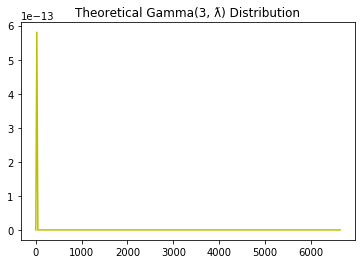

In [168]:
x = np.linspace (0, max_triplet_spacing, 294) 
y1 = stats.gamma.pdf(x, a=gamma3_lambda_hat, loc=3) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 
plt.title("Theoretical Gamma(3, ƛ) Distribution")

Text(0.5, 1.0, 'Observed Consecutive Triplets')

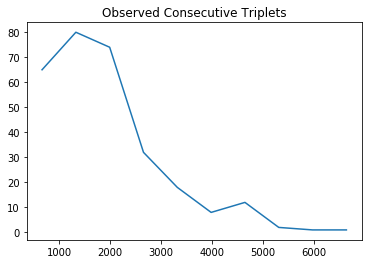

In [169]:
plt.plot(triplet_spacing_expected_val[1:], triplet_obs_cnts)  # observed counts of pairs of palindromes distributed across different spacing
plt.title("Observed Consecutive Triplets")


### Q3: Investigate COUNTS

In [192]:
df2 = pd.DataFrame({'bp': np.arange(1, 229356)})
df2['pal'] = np.where(df2['bp'].isin(hcmv), 1, 0)
df2['bin'] = pd.cut(df2['bp'], np.arange(0, 230000, 5000))
lambda_hat = (296/df2.groupby('bin')['pal'].sum().to_frame().shape[0]) #palindromes over num of bins
obs_counts = df2.groupby('bin')['pal'].sum().to_frame().reset_index()
expected_count = poisson.pmf(range(0,19), lambda_hat, loc=0) * df2.groupby('bin')['pal'].sum().to_frame().shape[0]
observed_count = []
for i in range(0, 19):
    observed_count.append(sum(obs_counts['pal']==i))
chisquare(observed_count, f_exp=expected_count, ddof = 1)

Power_divergenceResult(statistic=206.14299928352477, pvalue=1.661205473072876e-34)

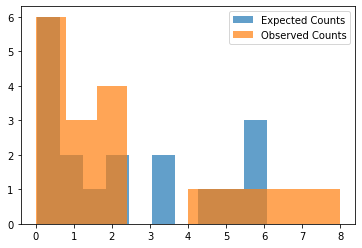

In [199]:
plt.hist(expected_count, label = "Expected Counts", alpha = 0.7)
plt.hist(observed_count, label = "Observed Counts", alpha = 0.7)
plt.legend()

In [194]:
## Decreasing Interval Size
df3 = pd.DataFrame({'bp': np.arange(1, 229356)})
df3['pal'] = np.where(df3['bp'].isin(hcmv), 1, 0)
df3['bin'] = pd.cut(df3['bp'], np.arange(0, 230000, 4500))
lambda_hat = (296/df3.groupby('bin')['pal'].sum().to_frame().shape[0])
obs_counts = df3.groupby('bin')['pal'].sum().to_frame().reset_index()
expected_count = poisson.pmf(range(0,19), lambda_hat, loc=0) * df3.groupby('bin')['pal'].sum().to_frame().shape[0]
observed_count = []
for i in range(0, 19):
    observed_count.append(sum(obs_counts['pal']==i))
chisquare(observed_count, f_exp=expected_count, ddof = 1)

Power_divergenceResult(statistic=750.6538513609935, pvalue=1.4696312060638725e-148)

In [195]:
## Increasing Interval Size
df4 = pd.DataFrame({'bp': np.arange(1, 229356)})
df4['pal'] = np.where(df4['bp'].isin(hcmv), 1, 0)
df4['bin'] = pd.cut(df4['bp'], np.arange(0, 230000, 5500))
lambda_hat = (296/df4.groupby('bin')['pal'].sum().to_frame().shape[0])
obs_counts = df4.groupby('bin')['pal'].sum().to_frame().reset_index()
expected_count = poisson.pmf(range(0,18), lambda_hat, loc=0) * df4.groupby('bin')['pal'].sum().to_frame().shape[0]
observed_count = []
for i in range(0, 18):
    observed_count.append(sum(obs_counts['pal']==i))
chisquare(observed_count, f_exp=expected_count, ddof = 1)

Power_divergenceResult(statistic=39.52890642340681, pvalue=0.0009118084440450936)

### Q4: Investigate Biggest Cluster

In [200]:
obs_max = df2.groupby('bin')['pal'].sum().max()
sim_max = []
lambda_hat = (296/df2.groupby('bin')['pal'].sum().to_frame().shape[0])

for i in range(1000):
    
    sim_counts = np.random.poisson(lambda_hat, df2.groupby('bin')['pal'].sum().to_frame().shape[0])
    sim_max.append(max(sim_counts))
    
sum(obs_max<np.array(sim_max))/1000

0.004

In [201]:
obs_max = df3.groupby('bin')['pal'].sum().max()
sim_max = []
lambda_hat = (296/df3.groupby('bin')['pal'].sum().to_frame().shape[0])

for i in range(1000):
    
    sim_counts = np.random.poisson(lambda_hat, df3.groupby('bin')['pal'].sum().to_frame().shape[0])
    sim_max.append(max(sim_counts))
    
sum(obs_max<np.array(sim_max))/1000

0.0

In [202]:
obs_max = df4.groupby('bin')['pal'].sum().max()
sim_max = []
lambda_hat = (296/df4.groupby('bin')['pal'].sum().to_frame().shape[0])

for i in range(1000):
    
    sim_counts = np.random.poisson(lambda_hat, df4.groupby('bin')['pal'].sum().to_frame().shape[0])
    sim_max.append(max(sim_counts))
    
sum(obs_max<np.array(sim_max))/1000

0.022

(array([  7.,  56., 174., 254., 237., 140.,  69.,  41.,  11.,  11.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 10 Patch objects>)

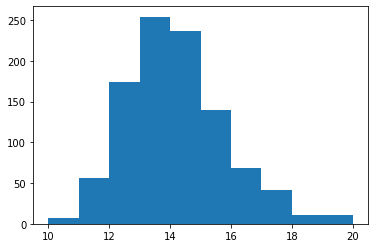

In [203]:
plt.hist(sim_max)

### Q5: Alternative Approach to Investigate Biggest Cluster

In [204]:
sim_max = []

for i in range(1000):

    rand_scatter = randint.rvs(1, 229355, size = 296)
    rand_scatter.sort()

    sim_bin_counts = []
    df5 = pd.DataFrame({'bp': np.arange(1, 229356)})
    df5['pal'] = np.where(df5['bp'].isin(rand_scatter), 1, 0)
    df5['bin'] = pd.cut(df5['bp'], np.arange(0, 230000, 5000))
    sim_counts = df5.groupby('bin')['pal'].sum().to_frame().reset_index()
    for i in range(0, max(sim_counts['pal']) + 1):
        sim_bin_counts.append(sum(sim_counts['pal']==i))

    sim_max.append(max(sim_bin_counts))

In [205]:
sum(obs_max<np.array(sim_max))/1000

0.0

(array([ 14.,  78., 258., 267., 196.,  95.,  51.,  25.,  10.,   6.]),
 array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.]),
 <a list of 10 Patch objects>)

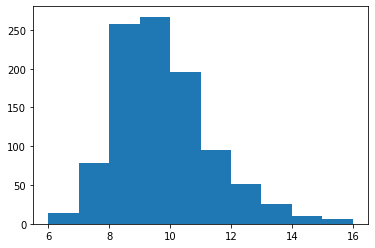

In [206]:
plt.hist(sim_max)

### Q6: Additional Question

In [219]:
pvals_dict = {}
int_range = [5000, 4500, 5500]
reps = 1000
for r in int_range:
    df = pd.DataFrame({'bp': np.arange(1, 229356)})
    df['pal'] = np.where(df['bp'].isin(hcmv), 1, 0)
    df['bin'] = pd.cut(df['bp'], np.arange(0, 240000, r))
    details = pd.DataFrame({'locPal': hcmv, 'dist': distance})
    details['bin'] = df.loc[df['bp'].isin(details['locPal'])]['bin'].values
    dist_bins = details.groupby('bin')['dist'].mean().to_frame().reset_index()
    obs = np.min(dist_bins['dist'])
    
    sim_stats = []
    for i in range(reps):
        rand_scatter = randint.rvs(1, 229355, size = 296)
        rand_scatter.sort()
    
        rand_spacing = np.diff(rand_scatter)
        df2 = pd.DataFrame({'pal': rand_scatter[1:], 'dist':rand_spacing})
    
        allLoc = pd.DataFrame({'bp': np.arange(1, 229356, 1)})
        allLoc['bin'] = pd.cut(allLoc['bp'], np.arange(0, 250000, r))
        combined = df2.merge(allLoc, how='left', left_on='pal', right_on='bp')
        dist_bins = combined.groupby('bin')['dist'].mean().to_frame().reset_index().dropna()
        sim_stats.append(min(dist_bins['dist']))
    
    pvals_dict[r] = sum(obs > np.array(sim_stats))/reps

In [220]:
pd.DataFrame({'Length of Interval': list(pvals_dict.keys()), 'p-value': list(pvals_dict.values())})

,Length of Interval,p-value
0,5000,0.242
1,4500,0.047
2,5500,0.183
